# Airline Bird Strikes in USA between 2000 - 2011

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')

## Data Exploration, Tranformation & Cleaning

### Loading the Dataset

In [2]:
df = pd.read_excel('Bird Strikes Data.xlsx')
pd.set_option('display.max_columns', 26)
df.head(3)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No


In [3]:
# fixing 'airport: name' column
df['Airport: Name'] = df['Airport: Name'].str.title()

In [4]:
# viewing the datasets information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [5]:
# dropping unnecessary columns
df.drop(['Record ID'], axis = 1, inplace = True)

In [6]:
# viewing data types
df.dtypes

Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                       object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Remarks                                            object
Wildlife: Size

In [7]:
# viewing null values
df.isnull().sum()

Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of bird

In [8]:
# viewing dataframe shape
df.shape

(25558, 25)

In [9]:
# dropping duplicate columns
df = df.drop_duplicates()

In [10]:
# viewing null values after dropping duplicate columns
df.isnull().sum()

Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23471
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23533
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4768
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of bird

In [11]:
# looking into the unique values in 'conditions: precipitation'
df['Conditions: Precipitation'].value_counts()

Conditions: Precipitation
Rain               1353
Fog                 475
Snow                 89
Fog, Rain            85
Rain, Snow            6
Fog, Snow             4
Fog, Rain, Snow       3
Name: count, dtype: int64

In [12]:
# looking into the unique values in 'conditions: sky'
df['Conditions: Sky'].value_counts()

Conditions: Sky
No Cloud      12635
Some Cloud     8705
Overcast       4208
Name: count, dtype: int64

In [13]:
# viewing 'conditions: precipitation' and 'conditions: sky'
temp = df[['Conditions: Precipitation', 'Conditions: Sky']]
temp.sample(25, random_state = 42)

,Conditions: Precipitation,Conditions: Sky
20422,NaN,Some Cloud
15967,NaN,No Cloud
12288,NaN,Overcast
5183,NaN,Some Cloud
20495,NaN,No Cloud
9935,NaN,Overcast
7763,NaN,Some Cloud
18205,NaN,No Cloud
13664,NaN,Some Cloud
4115,NaN,No Cloud


In [14]:
# replacing null values in 'conditions: precipitation' with 'none'
df['Conditions: Precipitation'] = df['Conditions: Precipitation'].fillna('None')

In [15]:
# viewing the df where 'aircraft: type' is null
df[df['Aircraft: Type'].isnull()].head(5)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
129,NaN,NaN,NaN,BELL-206,NaN,7,NaN,NaT,No damage,1,NaN,Louisiana,NaN,None,False,False,TAXI AT 3 FT OK. HELICOPTER,NaN,No Cloud,Rock pigeon,NaN,0,NaN,0,NaN
2014,NaN,NaN,NaN,AEROS 350,NaN,2,NaN,NaT,No damage,1,NaN,Hawaii,NaN,None,False,False,"NO DMG. TAXI AT 10 FT OK, HELICOPTER.",NaN,Some Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
3933,NaN,NaN,NaN,AEROS SA365,NaN,3,NaN,NaT,Caused damage,1,NaN,California,NaN,None,True,True,ID BY SMITHSONIAN. BIRDSTRIKE TOOK PLACE ON TH...,NaN,Some Cloud,Brown pelican,NaN,48609,NaN,0,NaN
4157,NaN,NaN,NaN,EC-135,NaN,4,NaN,NaT,Caused damage,NaN,NaN,Kentucky,NaN,None,False,False,TWO SMALL BIRDS STRUCK. NO INJURIES ASSOCIATED...,NaN,Some Cloud,Unknown bird - small,NaN,75,NaN,0,NaN
4873,NaN,NaN,NaN,BELL-206,NaN,1,NaN,NaT,Caused damage,1,NaN,Florida,NaN,None,False,False,HAZY.,NaN,No Cloud,Unknown bird - medium,NaN,0,NaN,0,NaN


In [16]:
# viewing the df where 'wildlife: number struck' is null
df[df['Wildlife: Number struck'].isnull()].head(5)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
129,NaN,NaN,NaN,BELL-206,NaN,7,NaN,NaT,No damage,1,NaN,Louisiana,NaN,None,False,False,TAXI AT 3 FT OK. HELICOPTER,NaN,No Cloud,Rock pigeon,NaN,0,NaN,0,NaN
2014,NaN,NaN,NaN,AEROS 350,NaN,2,NaN,NaT,No damage,1,NaN,Hawaii,NaN,None,False,False,"NO DMG. TAXI AT 10 FT OK, HELICOPTER.",NaN,Some Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
3933,NaN,NaN,NaN,AEROS SA365,NaN,3,NaN,NaT,Caused damage,1,NaN,California,NaN,None,True,True,ID BY SMITHSONIAN. BIRDSTRIKE TOOK PLACE ON TH...,NaN,Some Cloud,Brown pelican,NaN,48609,NaN,0,NaN
4157,NaN,NaN,NaN,EC-135,NaN,4,NaN,NaT,Caused damage,NaN,NaN,Kentucky,NaN,None,False,False,TWO SMALL BIRDS STRUCK. NO INJURIES ASSOCIATED...,NaN,Some Cloud,Unknown bird - small,NaN,75,NaN,0,NaN
4873,NaN,NaN,NaN,BELL-206,NaN,1,NaN,NaT,Caused damage,1,NaN,Florida,NaN,None,False,False,HAZY.,NaN,No Cloud,Unknown bird - medium,NaN,0,NaN,0,NaN


In [17]:
# populating 'wildelife: number struck' column
df['Wildlife: Number struck'] = df.apply(
    lambda row: 'Over 100' if pd.isnull(row['Wildlife: Number struck']) and (row['Wildlife: Number Struck Actual']) > 100
    else '11 to 100' if pd.isnull(row['Wildlife: Number struck']) and 10 > (row['Wildlife: Number Struck Actual']) < 101
    else '2 to 10' if pd.isnull(row['Wildlife: Number struck']) and 2 > (row['Wildlife: Number Struck Actual']) < 11
    else '1' if pd.isnull(row['Wildlife: Number struck']) and (row['Wildlife: Number Struck Actual']) == 1
    else row['Wildlife: Number struck'],
    axis = 1
)

In [18]:
# viewing null values
df.isnull().sum()

Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23471
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                      0
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4768
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of bird

In [19]:
# fixing 'pilot warned of birds or wildlife?' column
df['Pilot warned of birds or wildlife?'] = df['Pilot warned of birds or wildlife?'].replace('Y','Yes')
df['Pilot warned of birds or wildlife?'] = df['Pilot warned of birds or wildlife?'].replace('N','No')

In [20]:
# viewing unique values in 'effect: impact to flight' column
df['Effect: Impact to flight'].value_counts()

Effect: Impact to flight
Precautionary Landing    1120
Aborted Take-off          479
Other                     390
Engine Shut Down           88
Name: count, dtype: int64

In [21]:
# populating 'effect: impact to flight' column
df['Effect: Impact to flight'] = df['Effect: Impact to flight'].fillna('None')

In [22]:
# dropping rows with any null values
df = df.dropna()

In [23]:
# making a new column for flight month and year
df['Flight Month'] = df['FlightDate'].dt.month.astype(int)
df['Flight Year'] = df['FlightDate'].dt.year.astype(int)

In [24]:
# fixing month column
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Flight Month'] = df['Flight Month'].apply(lambda x: month_dict[x])

In [25]:
# viewing null values
df.isnull().sum()

Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above

In [26]:
# viewing the transformed dataset
df.head(3)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Flight Month,Flight Year
0,Airplane,Laguardia Ny,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,...,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,No,30736,1500.0,0,Yes,November,2000
1,Airplane,Dallas/Fort Worth Intl Arpt,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,...,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Yes,0,0.0,0,No,July,2001
2,Airplane,Lakefront Airport,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,...,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,No,0,50.0,0,No,September,2001


In [27]:
# exporting the transformed dataframe for visualizing it in tableau later
transformed_dataset_path = "bird_strikes_data_transformed.xlsx"
df.to_excel(transformed_dataset_path, index = False)

## WordCloud Analysis - Remarks

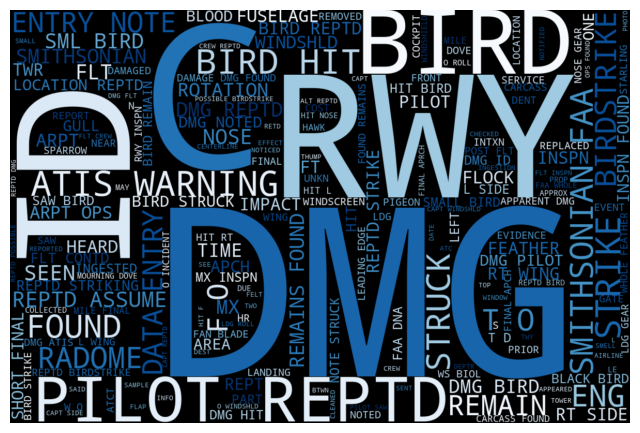

In [29]:
# plotting a wordcloud for the 'remarks' column
df['Remarks'] = df['Remarks'].apply(lambda x: str(x))

remarks = ' '.join(df['Remarks'].dropna())
remarks_wc = WordCloud(width = 1200, height = 800, stopwords = STOPWORDS, background_color = 'black', colormap = 'Blues').generate(remarks)

plt.figure(figsize = (8, 12))
plt.axis('off')
plt.imshow(remarks_wc, interpolation = 'bilinear')
plt.show()

## Correlation Analysis

In [30]:
# converting the entire dataframe to numerical values to perform correlation analysis
df_numerical = df
for column in df_numerical.columns:
    if df_numerical[column].dtype == 'object':
        df_numerical[column] = df_numerical[column].astype('category')
        df_numerical[column] = df_numerical[column].cat.codes
df_numerical.head()

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Flight Month,Flight Year
0,0,439,1,27,3,859,1,2000-11-23,0,1,257,34,1,...,False,False,6414,1,0,281,0,30736,1500.0,0,1,9,2000
1,0,174,0,213,3,424,2,2001-07-25,0,1,43,50,3,...,False,False,363,2,2,239,1,0,0.0,0,0,5,2001
2,0,445,0,104,3,261,2,2001-09-14,1,1,64,20,0,...,False,False,6064,2,0,104,0,0,50.0,0,0,11,2001
3,0,762,0,27,3,806,4,2002-09-05,1,1,33,55,1,...,True,False,12546,2,2,104,1,0,50.0,0,1,11,2002
4,0,594,0,122,3,942,2,2003-06-23,1,1,94,54,0,...,False,False,10916,2,0,104,0,0,50.0,0,0,6,2003


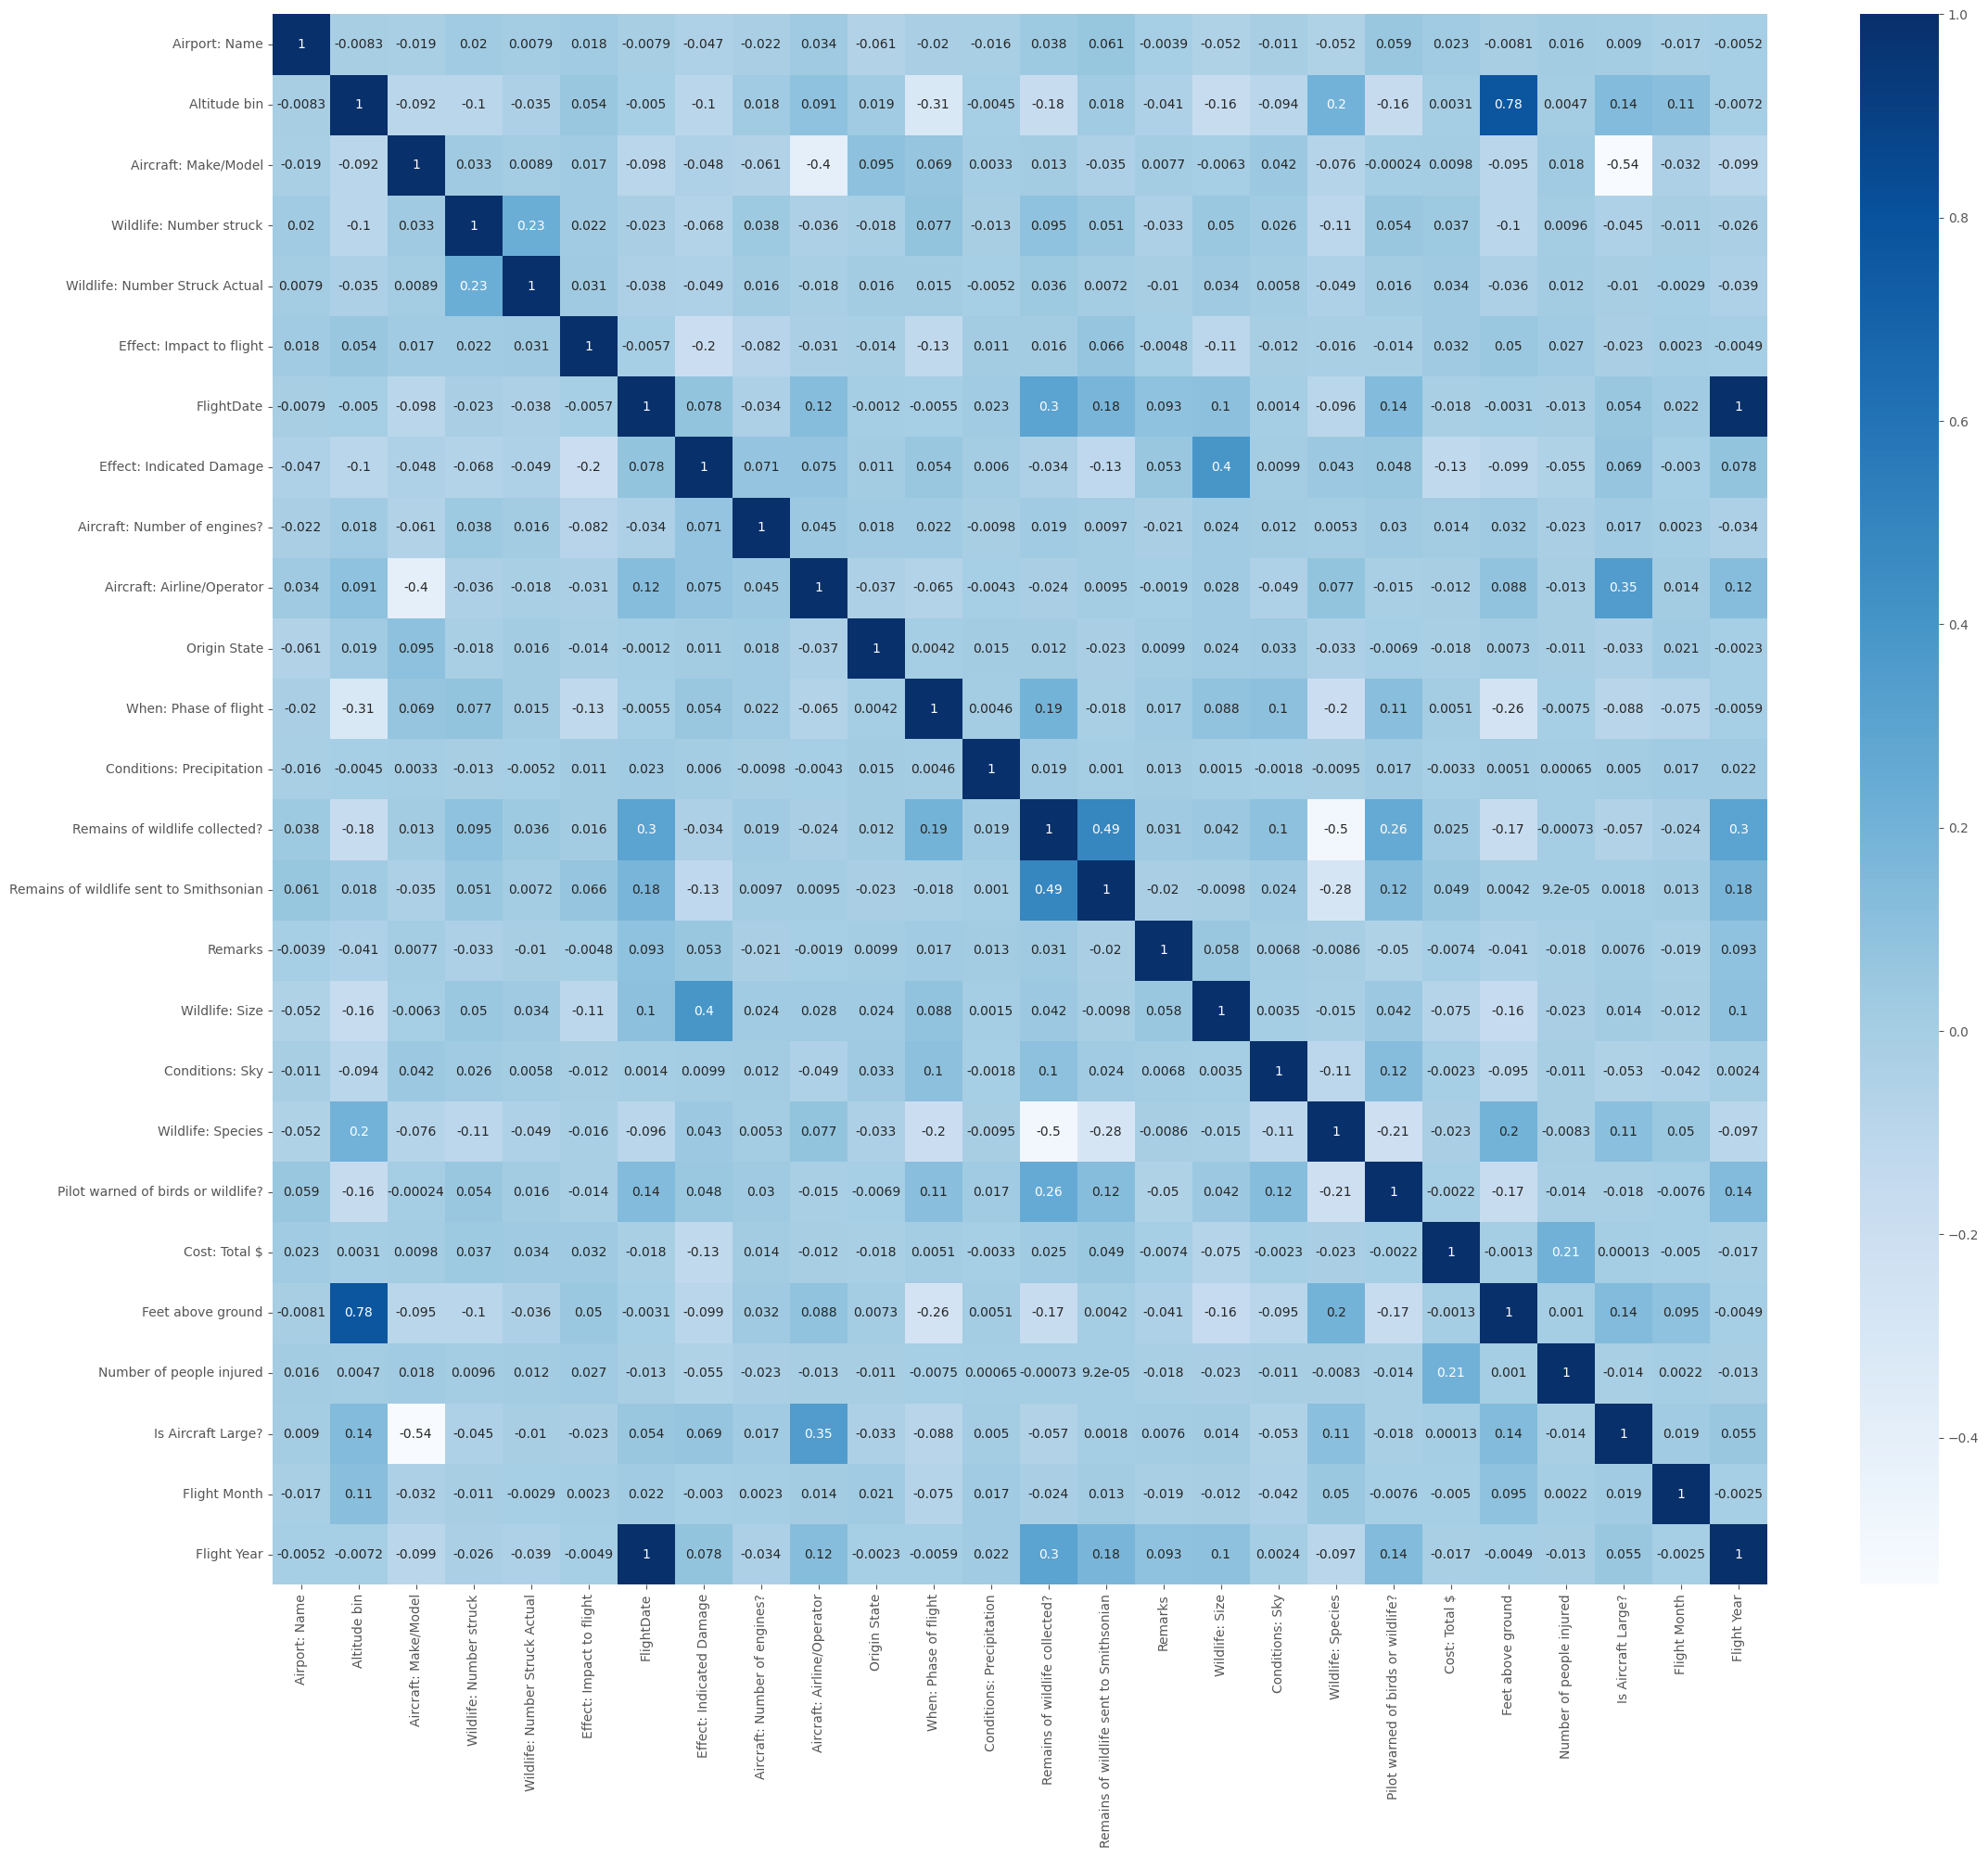

In [31]:
# heatmap of correlation matrix
df_numerical = df_numerical.drop(columns = ['Aircraft: Type'])
corr = df_numerical.corr()
plt.figure(figsize = (26, 22))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

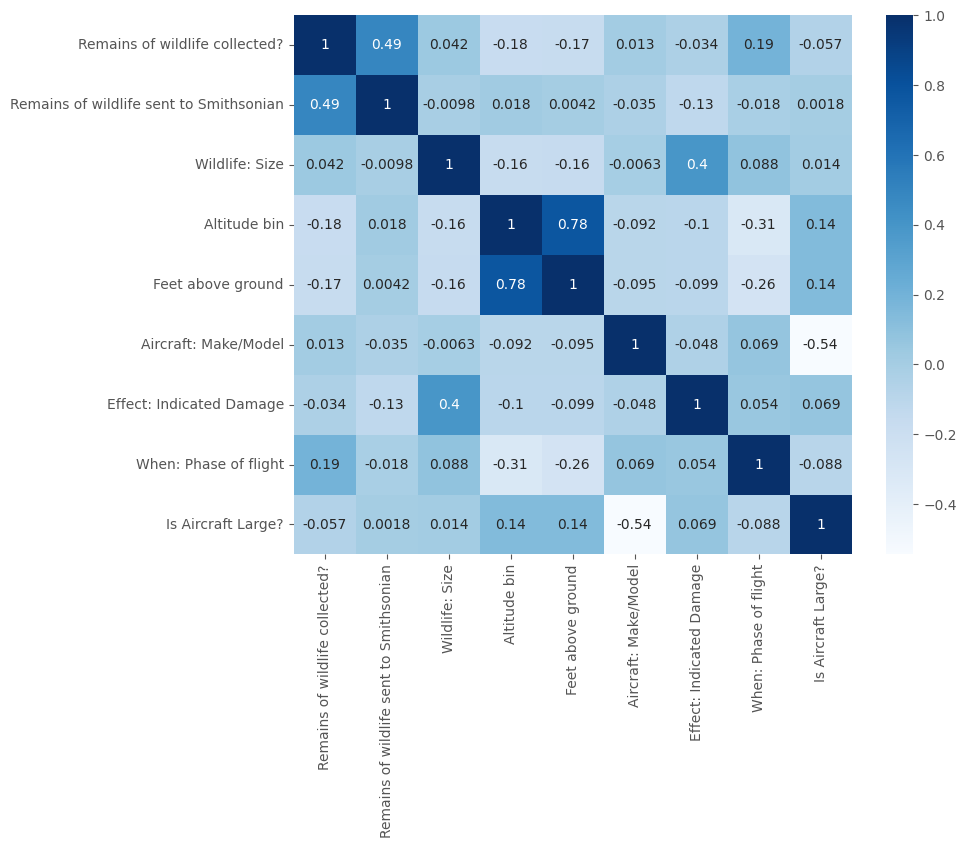

In [32]:
# heatmap of correlation matirx (highly correlated features)
df_high_corr = df[['Remains of wildlife collected?', 'Remains of wildlife sent to Smithsonian', 
                   'Wildlife: Size', 'Altitude bin','Feet above ground', 'Aircraft: Make/Model', 
                   'Effect: Indicated Damage', 'When: Phase of flight', 'Is Aircraft Large?']]

corr = df_high_corr.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()